# 2B. Data Exploration: Seasonality
<hr>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
import sys
sys.path.append('/content/drive/My Drive/Masters Project/datasets/clean_datasets/')

In [0]:
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import matplotlib.cm as cmx
import matplotlib.colors as colors
import seaborn as sb
import numpy as np
import datetime as dt
import csv
from datetime import datetime
%matplotlib inline

## Overall Goal:

The goal of the seasonality analysis is to flush out the model that we used for predicting AirBnB pricing. Prices obviously change over time, so this added level of specificity makes the model that much more usable. Obviously, this is a problem that AirBnB has been actively trying to incorporate into their pricing analysis. While we did seem a high level of predictive power for our model, to be able to generalize it to an entire year instead of one snapshot at a specific date is obviously very important. Also, we are hoping with the seasonal nature of the data, utilizing such analysis will help decrease the residuals of our predictors by allowing for more detailed predictions based on more factors. 

In [0]:
#Importing Datafile and converting to numbers
data = pd.read_csv(r'/content/drive/My Drive/Masters Project/datasets/clean_datasets/calendar_clean.csv')
data['price'] = data['price'].str.replace(',', '')
data['price'] = data['price'].str.replace('$', '')
data['price'] = data['price'].astype(float)
data['date']=pd.to_datetime(data['date'])
data['weekday'] = pd.Series(data.date).dt.dayofweek

This is what the dataset looks like right now. We needed to make changes to turn price into a float, date into a Python Datetime object, and create a column telling us what day of the week each date represents in the "day of week" column

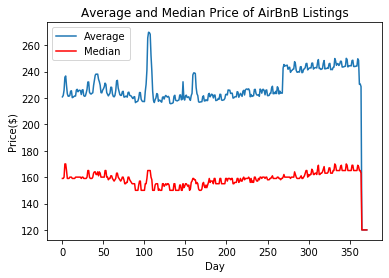

In [5]:
#Taking average/median values as well as plotting
date=[]
avg_price=[]
median_price=[]
for i in data['date'].unique():
    date.append(i)
    avg_price.append(data[data['date'] == i]['price'].mean())
    median_price.append(data[data['date'] == i]['price'].median())
plt.plot(range(len(avg_price)), avg_price, label= "Average")
plt.plot(range(len(avg_price)),median_price,color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day')
plt.title('Average and Median Price of AirBnB Listings')
plt.legend()

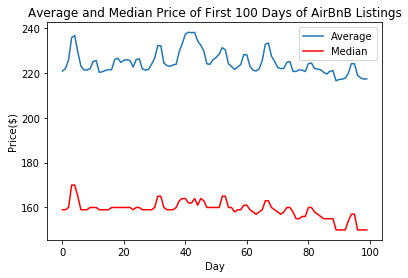

In [6]:
plt.plot(range(len(avg_price[0:100])), avg_price[0:100], label= "Average")
plt.plot(range(len(avg_price[0:100])),median_price[0:100],color='red', label = "Median")
plt.ylabel('Price($)')
plt.xlabel('Day')
plt.title('Average and Median Price of First 100 Days of AirBnB Listings')
plt.legend()

Text(0.5, 1.0, 'Average Price per Day of the Week')

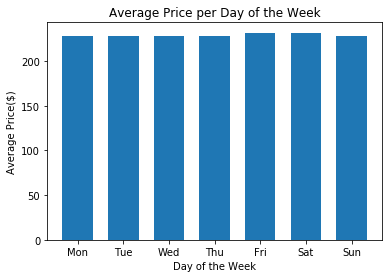

In [7]:
daily_avg_price=[]
daily_median_price=[]
b=['Mon','Tue','Wed','Thu','Fri','Sat','Sun']
for i in range(7):
    daily_avg_price.append(data[data['weekday'] == i]['price'].mean())
    daily_median_price.append(data[data['weekday'] == i]['price'].median())
plt.bar(range(len(daily_avg_price)),daily_avg_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Average Price($)')
plt.xlabel('Day of the Week')
plt.title('Average Price per Day of the Week')

Text(0.5, 1.0, 'Median Price per Day of the Week')

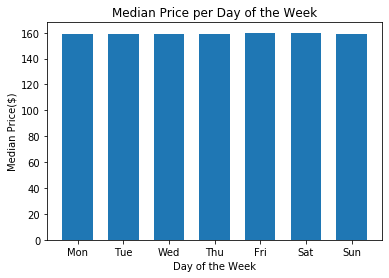

In [8]:
plt.bar(range(len(daily_avg_price)),daily_median_price,1/1.5)
plt.xticks(range(len(daily_avg_price)),b)
plt.ylabel('Median Price($)')
plt.xlabel('Day of the Week')
plt.title('Median Price per Day of the Week')

In [0]:
multiplier = []
for i in range(7):
    multiplier.append(daily_avg_price[i]/daily_avg_price[0])

In [10]:
multiplier

[1.0,
 1.0006357360578135,
 1.000524550974224,
 0.9988965091752163,
 1.0147454191353404,
 1.014854777666996,
 0.9973364077621714]

In [0]:
pricing_data=dict.fromkeys(b)

In [0]:
for i in pricing_data:
    pricing_data[i]=[]

In [0]:
## Alternate version where 
listing_id=[]
for i in data['listing_id'].unique():
    listing_id.append(i)
    for index,j in enumerate(b):
        pricing_data[j].append(data[(data['weekday'] == index) & (data['listing_id'] == i)]['price'].mean())

In [0]:
results = pd.DataFrame(pricing_data)
results['listing_id'] = listing_id
results_nona = results.dropna(axis = 0)
results_nona = results_nona[['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun', 'listing_id']]

In [0]:
results_nona

,Mon,Tue,Wed,Thu,Fri,Sat,Sun,listing_id
0,389.326923,388.226415,386.788462,391.750000,338.096154,337.865385,386.634615,142177
1,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,99.000000,51557
2,156.076923,158.924528,160.596154,159.750000,160.538462,158.500000,154.788462,958
3,98.365385,97.905660,98.096154,99.442308,109.807692,109.807692,99.442308,3850
4,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,52.000000,51773
...,...,...,...,...,...,...,...,...
2869,130.903846,130.754717,130.961538,130.826923,130.750000,130.980769,130.596154,15072528
2870,288.235294,288.269231,288.269231,288.461538,288.431373,288.431373,288.235294,14691164
2871,235.000000,235.365854,235.365854,235.625000,233.750000,233.750000,234.375000,13751537
2872,172.365385,173.207547,174.134615,172.500000,184.365385,186.038462,181.269231,15075530


In [0]:
results_nona.to_csv(r"C:\Users\jayaramkapil\OneDrive - The University of Memphis\Masters Project\datasets\clean_datasets\seasonality_tomodel.csv",index=False)

In [0]:
df = pd.DataFrame({'price':avg_price})
df.to_csv(r"C:\Users\jayaramkapil\OneDrive - The University of Memphis\Masters Project\datasets\clean_datasets\daily_price.csv",index=False)